In [1]:
import numpy as np
import torch
from scipy.integrate import odeint
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from torch import nn, autograd
from src.nn import FCN
from src.duffing_generator import DuffingGeneratorClass
from src.physics_loss import physics_loss_class

In [ ]:


  
# Set up the parameters and the training data for the model
d = 1.5
a = 1.0
b = 0.5 
gamma = 10
w = 10
x = torch.linspace(0, 1, 500).view(-1,1) 
y = solve_duffing(d, a, b, gamma, w, x).view(-1,1)
y_data = y[0:200:20]
x_data = x[0:200:20]
displacement_data = []
velocity_data = []   

In [ ]:

# Plot the Duffing oscillator data
plot_duffing_oscillator(d, a, b, gamma, w, x, y)
plt.show()

Input size of the linear layer: 32
Loss at Step 1000 : 0.0005386339161967479


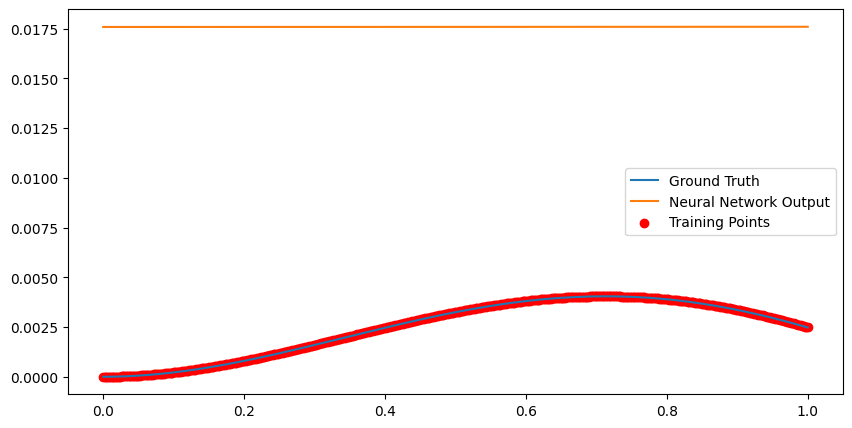

Loss at Step 2000 : 0.00036706447531237535


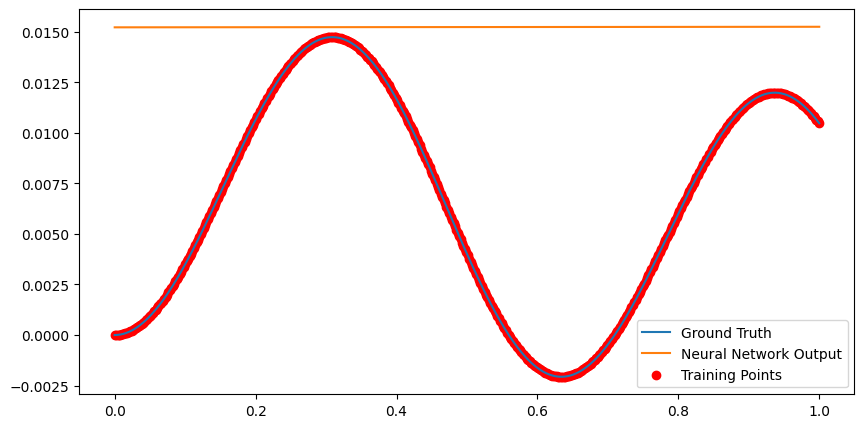

Loss at Step 3000 : 0.01175891986782717


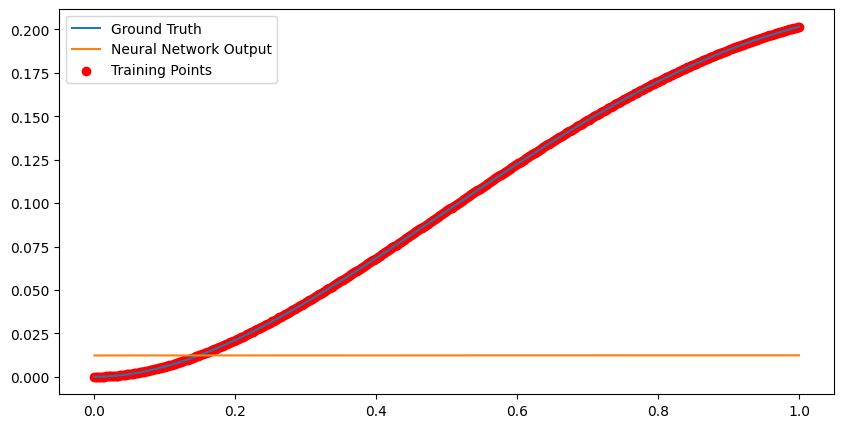

Loss at Step 4000 : 0.0010197385346071702


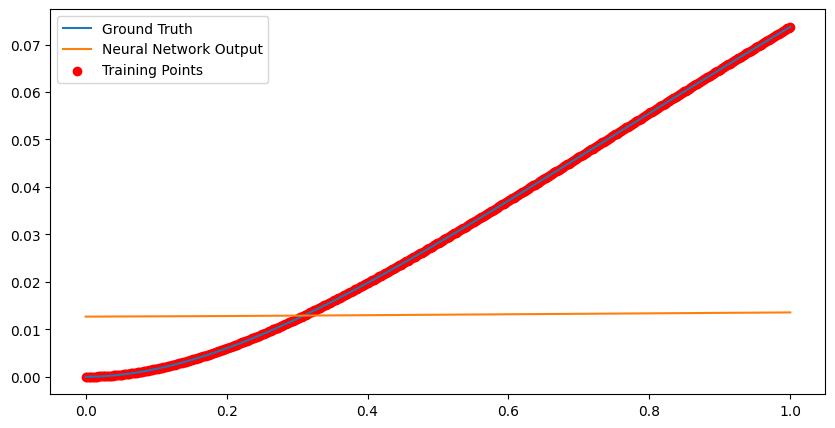

Loss at Step 5000 : 0.008742384510157797


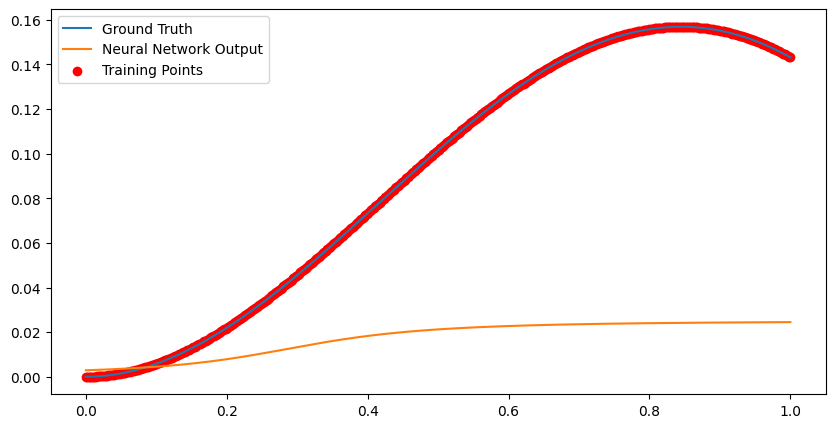

Loss at Step 6000 : 0.0007842839230983549


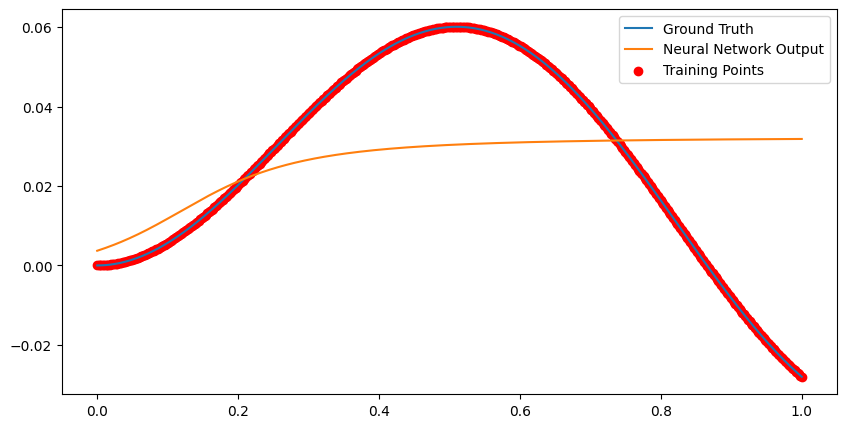

Loss at Step 7000 : 0.0005831065138850183


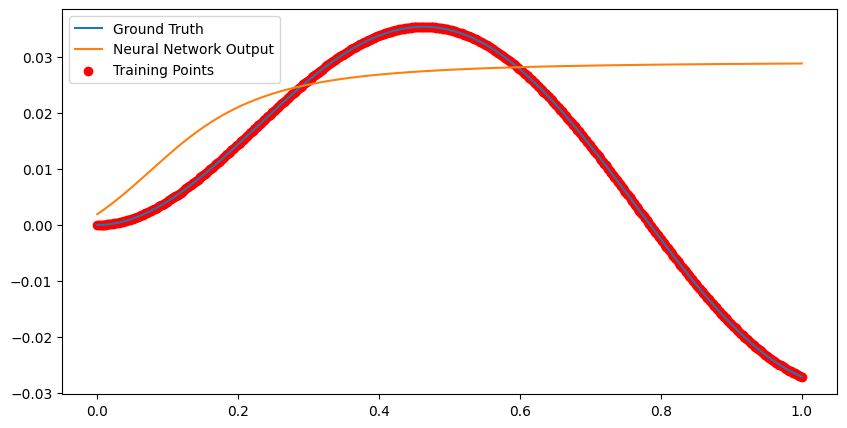

Loss at Step 8000 : 0.0017756487053396804


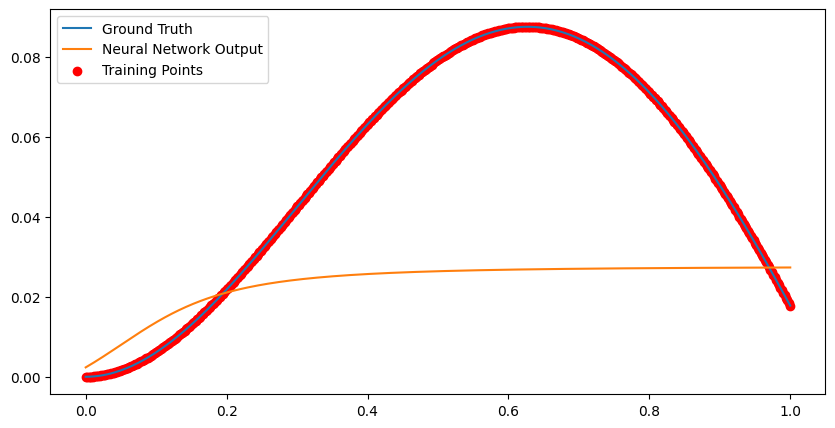

Loss at Step 9000 : 0.008372918131819446


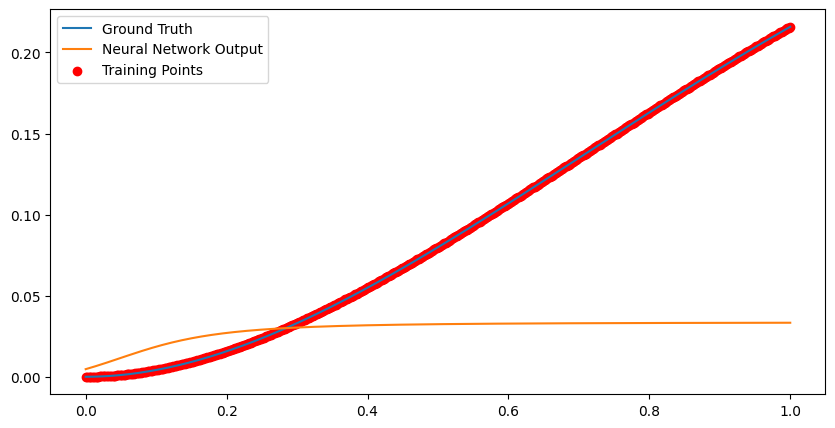

Loss at Step 10000 : 0.0006501245128753886


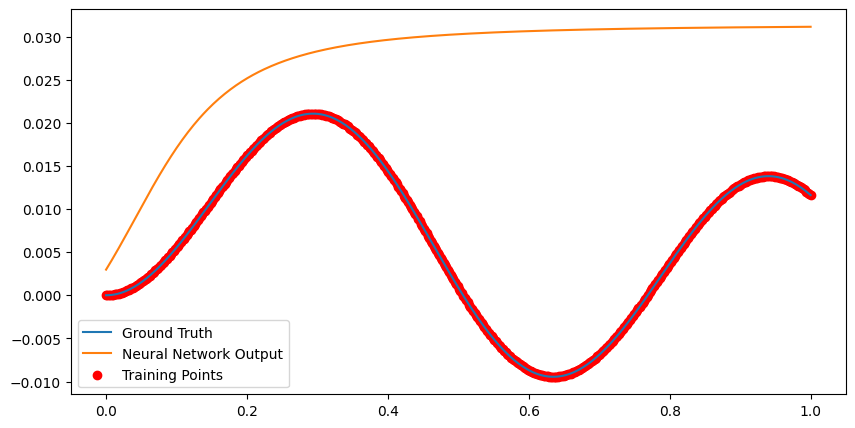

In [ ]:

# Initialization
x = torch.linspace(0, 1, 500).view(-1,1)
dg = DuffingGeneratorClass()  # Correct instantiation
model = FCN(1, 1, 32, 24)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
torch.manual_seed(123)
physics_loss_instance = physics_loss_class()
#initiate the physics loss training locatons
# Set up the physics loss training locations
x_physics = torch.linspace(0, 1, 30).view(-1, 1).requires_grad_(True)

# Boundary conditions
X_BOUNDARY = 0.0
F_BOUNDARY = 0.0

# Training loop
for i in range(100000):
    optimizer.zero_grad()
    batch = dg.duffing_generator(x)
    y, d, a, b, gamma, w, x = batch  # Extract batch elements
    x_data = x[0:1000:1]  # Update x_data from batch
    y_data = y[0:1000:1]
    yh = model(x_data)

    # Compute losses
    loss1 = torch.mean((yh - y_data)**2)
    loss_physics = physics_loss_instance.physics_loss(model, x_physics, d, a, b, gamma, w)
    x_boundary = torch.tensor([X_BOUNDARY]).view(-1, 1).requires_grad_(True)
    f_boundary = torch.tensor([F_BOUNDARY]).view(-1, 1)
    yh_boundary = model(x_boundary)
    loss_boundary = torch.mean((yh_boundary - f_boundary)**2)
    total_loss = loss1 + loss_physics + loss_boundary

    # Backpropagation
    total_loss.backward()
    optimizer.step()

    # Plotting every 1000 steps
    if (i + 1) % 1000 == 0:
        print("Loss at Step", i + 1, ":", total_loss.item())
        yh = model(x).detach().numpy()
        plt.figure(figsize=(10, 5))
        plt.plot(x_data.numpy(), y_data.numpy(), label='Ground Truth')  # Check if y_data is the correct ground truth
        plt.plot(x.numpy(), yh, label='Neural Network Output')
        plt.scatter(x_data.numpy(), y_data.numpy(), color='red', label='Training Points')
        plt.legend()
        plt.show()

# Self-feeding predictions
x_self_feed = x_data[0].reshape(1, -1)
predictions = []
for _ in range(100):  # Define n_steps = 100 directly in the loop
    with torch.no_grad():
        y_pred = model(x_self_feed)
    predictions.append(y_pred.item())
    x_self_feed = y_pred.reshape(1, -1)  # Ensure correct shape for the next input

# Convert predictions to a tensor for analysis
predictions_tensor = torch.tensor(predictions).view(-1, 1)


# Assuming 'y' contains the ground-truth data
# Let's perform stability analysis
ground_truth = y[:n_steps]  # Ground-truth data for comparison
difference = torch.abs(predictions_tensor - ground_truth)  # Calculate the difference

# Finding the step at which predictions become unstable
threshold = 0.1  # A predefined threshold
unstable_step = torch.where(difference > threshold)[0].min().item()

# Plotting the prediction at the unstable step, variance from threshold, and ground truth


plt.figure(figsize=(10, 6))
plt.plot(predictions_tensor[:unstable_step], label='Predictions', color='blue')
plt.plot(ground_truth[:unstable_step], label='Ground Truth', color='green')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title(f'Prediction and Ground Truth up to Unstable Step {unstable_step}')
plt.legend()
plt.grid(True)
plt.show()

     
    # Plot the results every 150 steps
if (i+1) % 1000 == 0: 
            # Print the loss value after each step
    print("Loss at Step", i+1, ":", total_loss.item())
    yh = model(x).detach().numpy()
    plt.figure(figsize=(10, 5))
    plt.plot(x.numpy(), y.numpy(), label='Ground Truth')
    plt.plot(x.numpy(), yh, label='Neural Network Output')
    plt.scatter(x_data.numpy(), y_data.numpy(), color='red', label='Training points')
    plt.legend()
    plt.show()



In [ ]:
print(x.shape)
print(y.shape)
print(yh.shape)
print(y_data.shape)

In [2]:
print(torch.cuda.is_available())


True
